# Environment setup & graphical parameters

In [1]:
# Import packages

import os
import pandas as pd
import numpy as np
import seaborn as sns

%pylab inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Function creation

#Count the number of word in a string varibale
def count_words(df, column):
    list_words = set()
    for word in df[column].str.split(','):
        if isinstance(word, float): continue
        list_words = set().union(word, list_words)       
    print("Nb of categories in '{}': {}".format(column, len(list_words)))
    return list(list_words)

# Calculated the missing rate of a column
def filling_factor(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df['filling_factor'] = (df.shape[0]-missing_df['missing_count'])/df.shape[0]*100
    missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
    return missing_df

# Load datasets

In [3]:
#Load datasets

df_2015 = pd.read_csv('data/2015-building-energy-benchmarking.csv')
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [4]:
df_2016 = pd.read_csv('data/2016-building-energy-benchmarking.csv')
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

## Comparison between 2015 and 2016 dataset

We have two datasets from 2015 and 2016. The purpose is to create a single dataset with all the data. So first I check if those dataset structure and variable are the same.

In [5]:
# Check if the two dataset have the same columns
list_1 = list(df_2015.columns) 
list_2 = list(df_2016.columns)

def comp_col(list_1, list_2):
    return list_1 == list_2

print(comp_col(list_1, list_2))

False


In [6]:
# Check 2015 columns variation
def comp_col(list_1, list_2):
    dif_list_1_list_2 = list(set(list_1) - set(list_2))
    dif_list_2_list_1 = list(set(list_2) - set(list_1))
    return dif_list_1_list_2 , dif_list_2_list_1

print("Column in 2015 file and missing in 2016 file:")
comp_col(list_1, list_2)[0]

Column in 2015 file and missing in 2016 file:


['SPD Beats',
 'Zip Codes',
 'Seattle Police Department Micro Community Policing Plan Areas',
 '2010 Census Tracts',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'OtherFuelUse(kBtu)',
 'City Council Districts',
 'Comment',
 'Location',
 'GHGEmissions(MetricTonsCO2e)']

In [7]:
# Check 2016 columns variation
print("Column in 2016 file and missing in 2015 file:")
comp_col(list_1, list_2)[1]

Column in 2016 file and missing in 2015 file:


['City',
 'GHGEmissionsIntensity',
 'Longitude',
 'TotalGHGEmissions',
 'Address',
 'ZipCode',
 'Comments',
 'Latitude',
 'State']

The are actually variables in dataset which are not present in the other one.

- Location variable: in 2015 Zip Code, Location and in 2016 Adress, State, ZipCode, Latitude, City, Longitude
- GHGEmissions(MetricTonsC02e) and GHGEmissionsIntensity(kgCO2e/ft2) in 2015 which seems to correspond to GHGEmissionsIntensity and TotalGHGEmissions in 2016 / Comment in 2015 and Comments in 2016 
- 2010 Census Tracts, SPD Beats, Seattle Police Department Micro Community Policing Plan Areas, City Council Districts, OtherFuelUse(kBtu) in 2015 which seems to not be present in 2016 <- drop

### Adjusting location data on 2015 file

In [8]:
df_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

The variable Location in 2015 file seems to combine all the other location variables present in 2016 

In [9]:
# Separate Location datas on several variable to match 2016 file 
import ast

df_2015['Location'] = [ast.literal_eval(str(item)) for index, item in df_2015.Location.iteritems()]
df_2015 = pd.concat([df_2015.drop(['Location'], axis=1), df_2015['Location'].apply(pd.Series)], axis=1)

df_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in df_2015.human_address.iteritems()]
df_2015 = pd.concat([df_2015.drop(['human_address'], axis=1), df_2015['human_address'].apply(pd.Series)], axis=1)

df_2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0   MAYFLOWER PARK HOTEL                     659000030                    7   
1        PARAMOUNT HOTEL                     659000220                    7   
2           WESTIN HOTEL                     659000475                    7   
3              HOTEL MAX                     659000640                    7   
4  WARWICK SEATTLE HOTEL                     659000970                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   
2                 246.5           73130656.0             75506272.0   
3                 643.2           28229320.0             28363444.0   
4              

In [10]:
# Rename column to match 2016 file

df_2015 = df_2015.rename(columns={"latitude":"Latitude", 
                                  "longitude":"Longitude",
                                  "address":"Address", 
                                  "city":"City", 
                                  "state":"State", 
                                  "zip":"ZipCode"})

### GHGEmissionsIntensity and TotalGHGEmissions comparison

In [11]:
# Look the distibution the check if those variable are indeed the same but just not named the same
print(f"GHGEmissions(MetricTonsCO2e) 2015 descripton: \n\n",
      df_2015['GHGEmissions(MetricTonsCO2e)'].describe(),
      f"\n\nTotalGHGEmissions 2016 description: \n\n", 
      df_2016['TotalGHGEmissions'].describe(),
      f"\n\nGHGEmissionsIntensity(kgCO2e/ft2) 2015 description: \n\n", 
      df_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe(),
      f"\n\nGHGEmissionsIntensity 2016 description: \n\n", 
      df_2016['GHGEmissionsIntensity'].describe(),
      )

GHGEmissions(MetricTonsCO2e) 2015 descripton: 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64 

TotalGHGEmissions 2016 description: 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64 

GHGEmissionsIntensity(kgCO2e/ft2) 2015 description: 

 count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64 

GHGEmissionsIntensity 2016 description: 

 count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.3

Those variable seems to be match 2 by 2

In [12]:
# Renaming variable to match 2016
df_2015 = df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                  'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                  'Comment':'Comments'})

# Deleting 2015 variables which are not in 2016
df_2015.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
              'Seattle Police Department Micro Community Policing Plan Areas',
              'City Council Districts','SPD Beats', 
              'Zip Codes'], axis=1, inplace=True)

In [13]:
list_1 = list(df_2015.columns) 
list_2 = list(df_2016.columns)
comp_col(list_1, list_2)

([], [])

In [14]:
# Check variable types
pd.DataFrame([df_2015.dtypes, df_2016.dtypes])

OSEBuildingID DataYear BuildingType PrimaryPropertyType PropertyName  \
0         int64    int64       object              object       object   
1         int64    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings NumberofFloors PropertyGFATotal PropertyGFAParking  \
0             int64        float64            int64              int64   
1           float64          int64            int64              int64   

  PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                  int64                    object                 object   
1                  int64                    object                 object   

  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                   float64                       object   
1                   float64                       object   

  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                         float64                      object   
1                         float64                      object   

  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified ENERGYSTARScore  \
0                        float64                   object         float64   
1                        float64                   object         float64   

  SiteEUI(kBtu/sf) SiteEUIWN(kBtu/sf) SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf)  \
0          float64            float64            float64              float64   
1          float64            float64            float64              float64   

  SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh)  \
0             float64               float64        float64          float64   
1             float64               float64        float64          float64   

  Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) TotalGHGEmissions  \
0           float64            float64          float64           float64   
1           float64            float64          float64           float64   

  GHGEmissionsIntensity DefaultData Comments ComplianceStatus Outlier  \
0               float64      object   object           object  object   
1               float64        bool  float64           object  object   

  Latitude Longitude Address    City   State  ZipCode  
0   object    object  object  object  object   object  
1  float64   float64  object  object  object  float64

In [15]:
# Modification of variable type
df_2015[['Latitude','Longitude', 'ZipCode']] = df_2015[['Latitude','Longitude', 'ZipCode']].astype('float64')

In [16]:
# Grouping of 2015 and 2016 file
df = pd.concat([df_2015[df_2016.columns],df_2016], axis=0).sort_values(["DataYear", "OSEBuildingID"])
df.shape

(6716, 46)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   Address                          6716 non-null   object 
 6   City                             6716 non-null   object 
 7   State                            6716 non-null   object 
 8   ZipCode                          6700 non-null   float64
 9   TaxParcelIdentificationNumber    6714 non-null   object 
 10  CouncilDistrictCode              6716 non-null   int64  
 11  Neighborhood                     6716 non-null   object 
 12  Latitude            

## Data cleaning

### Habitation data removing

The study is only on non residential building

In [18]:
#Check Building type possibility
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [19]:
# The study is on non residential building so we delete 'Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)'
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [20]:
df.shape

(3318, 46)

### Missing values

In [21]:
data = df.copy()

In [22]:
df = data.copy()

In [23]:
# Drop line with all NaN

df.dropna(how='all', axis=0, inplace=True)
df.shape

(3318, 46)

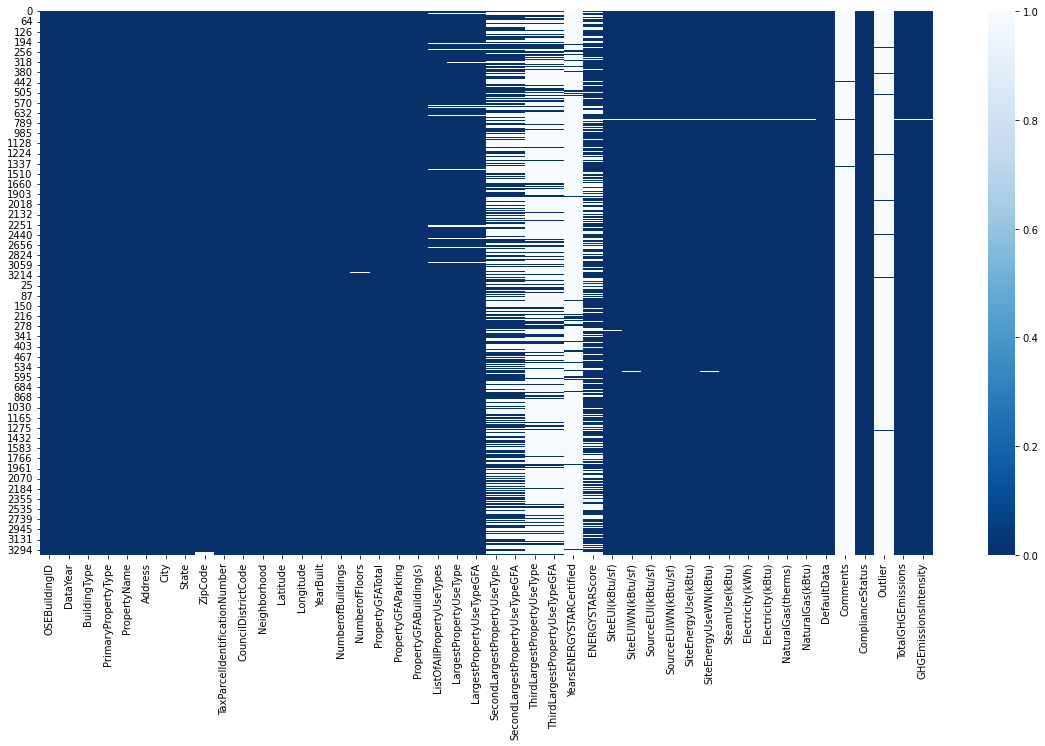

                        column_name  missing_count  filling_factor
0                          Comments           3306        0.361664
1                           Outlier           3270        1.446655
2          YearsENERGYSTARCertified           3130        5.666064
3       ThirdLargestPropertyUseType           2634       20.614828
4    ThirdLargestPropertyUseTypeGFA           2634       20.614828
5      SecondLargestPropertyUseType           1651       50.241109
6   SecondLargestPropertyUseTypeGFA           1651       50.241109
7                   ENERGYSTARScore           1107       66.636528
8            LargestPropertyUseType             71       97.860157
9         LargestPropertyUseTypeGFA             71       97.860157
10        ListOfAllPropertyUseTypes             63       98.101266
11                          ZipCode             16       99.517782
12               SiteEUIWN(kBtu/sf)             10       99.698614
13                 SiteEUI(kBtu/sf)             10       99.69

In [24]:
# Visualise and check NaN
figure = plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cmap="Blues_r")
plt.show() 

print(filling_factor(df))

8 variables have a lot of missing values >= 50% 
                       column_name  missing_count  filling_factor
0                          Comments           3306        0.361664
1                           Outlier           3270        1.446655
2          YearsENERGYSTARCertified           3130        5.666064
3       ThirdLargestPropertyUseType           2634       20.614828
4    ThirdLargestPropertyUseTypeGFA           2634       20.614828
5      SecondLargestPropertyUseType           1651       50.241109
6   SecondLargestPropertyUseTypeGFA           1651       50.241109
7                   ENERGYSTARScore           1107       66.636528
   
Outlier, Comments and YearsENERGYSTARCertified are going to be delete

For the rest it's possible that missing value means that the buiding does not have any Second or Third use. This means that NAN should be actually 0 for the GFA's variables. Concerning the type's variable I will change NaN by a 'str' value -> No information

EnergySTARSscore I have to keep it because we need to define if it is a essential features for models


In [25]:
# Delete unneeded variable 
df.drop(['Outlier','Comments','YearsENERGYSTARCertified'], axis=1, inplace=True)

In [26]:
# For numeric column complete NaN with 0

col_nan_to_zero = ['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']
df[col_nan_to_zero] = df[col_nan_to_zero].fillna(0)

In [27]:
# For categorical column complete NaN with 'No information'

col_no_use = ['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
df[col_no_use] = df[col_no_use].fillna('No information')

We will drop the line with remaining NaN values excepted from ENERGYSTARscore

In [28]:
# Drop All other NaN
NaN_index = df[df.loc[:, df.columns != 'ENERGYSTARScore'].isna().sum(axis=1) > 0].index
df.drop(index=NaN_index, inplace=True)

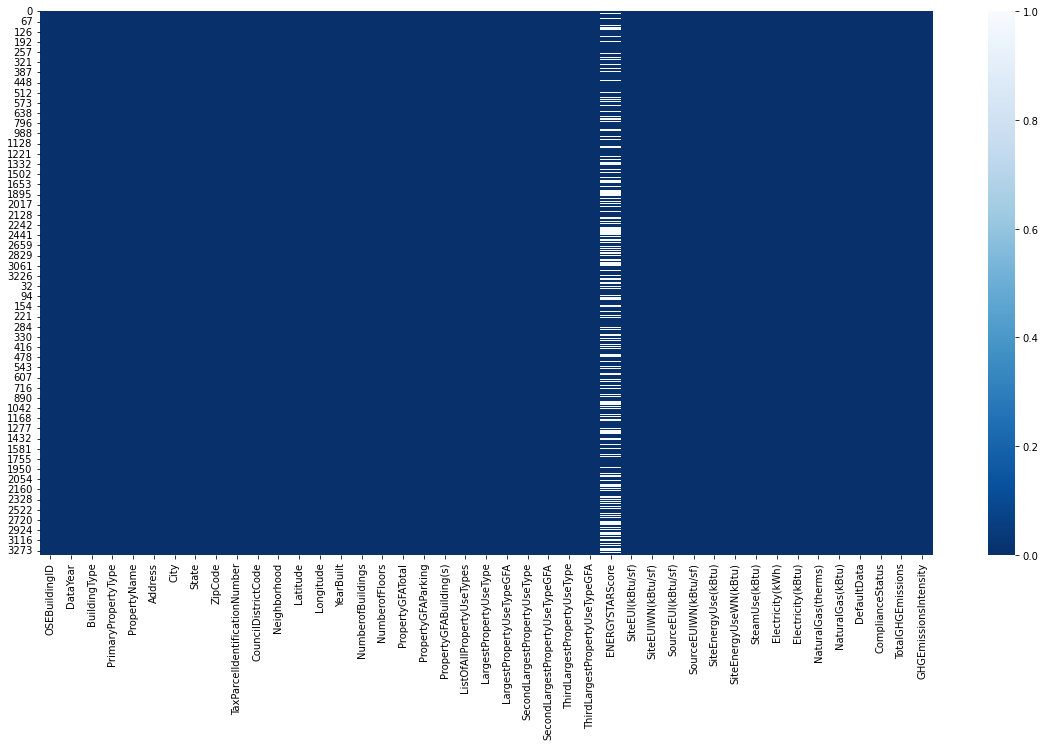

(3153, 43)

In [29]:
# Visualise and check NaN
figure = plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cmap="Blues_r")
plt.show()

df.shape

### Column analysis

In [30]:
# Column by column analysis
for column in df.columns:
    if df[column].nunique() < 20:
        print('Column {}, unique value :\n{}\n'.format(column, df[column].unique()))
    else:
        print('Column {}, {} unique value'.format(column, df[column].nunique()))

Column OSEBuildingID, 1657 unique value
Column DataYear, unique value :
[2015 2016]

Column BuildingType, unique value :
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']

Column PrimaryPropertyType, 28 unique value
Column PropertyName, 3044 unique value
Column Address, 2968 unique value
Column City, unique value :
['SEATTLE' 'Seattle']

Column State, unique value :
['WA']

Column ZipCode, 48 unique value
Column TaxParcelIdentificationNumber, 1779 unique value
Column CouncilDistrictCode, unique value :
[7 3 2 4 5 6 1]

Column Neighborhood, unique value :
['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'BALLARD' 'GREATER DUWAMISH'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest']

Column Latitude, 2936 unique value
Column Longitude, 2832 unique value
Column YearBuilt, 113 unique value
Column NumberofBuildings, unique value :
[  1.  11.  16.   4.   3.  39.   2

Variable explication
Several variable specify the area (GFA = Gross floor area) :

    PropertyGFAParking 
    PropertyGFABuilding(s) 
    ListOfAllPropertyUseTypes : list of all use (Hotel, Parking, Restaurant, etc.)
    LargestPropertyUseType / LargestPropertyUseTypeGFA 
    SecondLargestPropertyUseType / SecondLargestPropertyUseTypeGFA 
    ThirdLargestPropertyUseType / ThirdLargestPropertyUseTypeGFA 

Concerning energy, ENERGY STAR website tells us :

    SiteEUI(kBtu/sf) / SiteEUIWN(kBtu/sf) : Energy Use Intensity (EUI); it's the energy use by a building by its area and other carateristics.
    SourceEUI(kBtu/sf) / SourceEUIWN(kBtu/sf) : it's the unity of evaluation the most fair to compare buildings. The ernerfy source is the total quantity of raw combustible needed for the building

SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh) Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) energy measure (those are the data that should stay confidential and that we try to avoid by doing a modelisation:

    kBTu : le B.T.U. (British Thermal Unit) = 1055,06 Joule or 252 calories.

    therms : = 1 000 000 BTU.

    1 kWh = 0.034095106405145 thm
    1 thm = 29.329722222222 kWh

I will delete varibale that we don't need for the study

State (a unique value), variable which end up with WN (Weather Normalized), City, And other repeated values

*Electricity(kWh)* / Electricity(kBtu) *NaturalGas(therms)* / NaturalGas(kBtu) I will keep kBtu for all energy variables to have homogeneity


In [31]:
# Delete repeated Data
df = df.drop(['Electricity(kWh)','NaturalGas(therms)', 'State', 'City'], axis=1)

In [32]:
# Delete variable with WN suffix because it's repeating information
def search_componant(df, suffix=None):
    componant = []
    for col in df.columns:
        if suffix in col: 
            componant.append(col)
    return componant

df.drop(search_componant(df,'WN'), axis=1, inplace=True)

### Check outliers

#### Quantitative variable

In [33]:
#Check outliers

df_numeric = df.select_dtypes(include=[np.number])
continous_cols = df_numeric.columns.values

mask = df_numeric == 0
mask = mask.astype(int)

#I had a column to describ to count the number of 0 per variable
pd.concat([round(df_numeric.describe(), 2), pd.DataFrame(mask.sum(axis=0)).T])

OSEBuildingID  DataYear   ZipCode  CouncilDistrictCode  Latitude  \
count        3153.00    3153.0   3153.00              3153.00   3153.00   
mean        15848.55    2015.5  98116.63                 4.37     47.62   
std         13141.61       0.5     17.04                 2.20      0.05   
min             1.00    2015.0  98006.00                 1.00     47.50   
25%           585.00    2015.0  98104.00                 2.00     47.59   
50%         21117.00    2016.0  98109.00                 4.00     47.61   
75%         24514.00    2016.0  98125.00                 7.00     47.65   
max         50101.00    2016.0  98199.00                 7.00     47.73   
0               0.00       0.0      0.00                 0.00      0.00   

       Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
count    3153.00    3153.00            3153.00         3153.00   
mean     -122.33    1961.56               1.12            4.11   
std         0.02      32.76               2.26            6.52   
min      -122.41    1900.00               0.00            0.00   
25%      -122.34    1930.00               1.00            1.00   
50%      -122.33    1965.00               1.00            2.00   
75%      -122.32    1989.00               1.00            4.00   
max      -122.26    2015.00             111.00           99.00   
0           0.00       0.00              49.00           20.00   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count           3153.00             3153.00                 3153.00   
mean          114512.98            12961.37               101551.61   
std           252763.43            43337.30               235990.76   
min            16300.00               -2.00               -50550.00   
25%            29636.00                0.00                28586.00   
50%            48925.00                0.00                46970.00   
75%           103566.00                0.00                93660.00   
max          9320156.00           512608.00              9320156.00   
0                  0.00             2512.00                    0.00   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count                    3153.00                          3153.00   
mean                    94403.57                         17978.26   
std                    227590.26                         49442.98   
min                      5656.00                             0.00   
25%                     25547.00                             0.00   
50%                     43122.00                             0.00   
75%                     89200.00                         12689.00   
max                   9320156.00                        686750.00   
0                           0.00                          1680.00   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                         3153.00          2109.00           3153.00   
mean                          2813.02            65.02             70.88   
std                          14002.12            28.39             70.97   
min                              0.00             1.00              0.00   
25%                              0.00            48.00             33.10   
50%                              0.00            73.00             51.60   
75%                              0.00            89.00             81.30   
max                         303910.00           100.00            834.40   
0                             2536.00             0.00             16.00   

       SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
count             3153.00         3.153000e+03    3.153000e+03   
mean               173.88         7.846892e+06    4.879635e+05   
std                176.95         2.439183e+07    5.279296e+06   
min                 -2.00         0.000000e+00    0.000000e+00   
25%                 75.80         1.227290e+06    0.000000e+00   
50%                130.90         2.

Concerning outliers except for latitude and longitude we should not have any negative number plus I will considere that if NumberofBuilding(s) and Numberoffloors = 0 it is that it's actually 1

In [34]:
# Only one outlier for PropertyGFAParking
df[df['PropertyGFAParking'] < 0]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3136          29551      2015  NonResidential  Small- and Mid-Sized Office   

       PropertyName        Address  ZipCode TaxParcelIdentificationNumber  \
3136  625 5TH AVE S  625 5TH AVE S  98104.0                    8809700040   

      CouncilDistrictCode Neighborhood   Latitude   Longitude  YearBuilt  \
3136                    2     DOWNTOWN  47.597252 -122.327747       2000   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3136                1.0            11.0             68452                  -2   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
3136                   68454       Bank Branch, Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3136                    61665.0                  Bank Branch   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3136                           6787.0              No information   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3136                             0.0             81.0              53.6   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
3136               168.4            3670298.0             0.0   

      Electricity(kBtu)  NaturalGas(kBtu) DefaultData ComplianceStatus  \
3136          3670451.0               0.0          No        Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
3136              25.59                   0.14

In [35]:
# Only two outliers for PropertyGFABuilding
df[df['PropertyGFABuilding(s)'] < 0]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3139          29788      2015  NonResidential  Small- and Mid-Sized Office   
3322          50002      2015  NonResidential                        Other   

                        PropertyName           Address  ZipCode  \
3139   QUEEN ANNE SQUARE WEST (2013)   220 W MERCER ST  98119.0   
3322  FREEWAY MOTORS UNIVERSITY AUDI  4741 11TH AVE NE  98105.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
3139                    7015350000                    7   
3322                    6746701515                    4   

               Neighborhood   Latitude   Longitude  YearBuilt  \
3139  MAGNOLIA / QUEEN ANNE  47.624968 -122.359705       1982   
3322              NORTHEAST  47.664111 -122.316639       2014   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3139                1.0             5.0             54015               97325   
3322                1.0             3.0             33648               84198   

      PropertyGFABuilding(s)       ListOfAllPropertyUseTypes  \
3139                  -43310                          Office   
3322                  -50550  Automobile Dealership, Parking   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3139                 Office                    54015.0   
3322                Parking                    83600.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3139               No information                              0.0   
3322        Automobile Dealership                          39000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3139              No information                             0.0   
3322              No information                             0.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
3139             65.0              64.0               200.9   
3322              NaN              35.6               111.9   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
3139            3455247.0             0.0          3455391.0   
3322            1389553.0             0.0          1389610.0   

      NaturalGas(kBtu) DefaultData ComplianceStatus  TotalGHGEmissions  \
3139               0.0          No        Compliant              24.09   
3322               0.0          No        Compliant               9.69   

      GHGEmissionsIntensity  
3139                   0.17  
3322                   0.11

In [36]:
# Only one outliers for PropertyGFABuilding
df[df['SourceEUI(kBtu/sf)'] < 0]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3246          49784      2015  NonResidential  Small- and Mid-Sized Office   

        PropertyName            Address  ZipCode  \
3246  BULLITT CENTER  1501 E MADISON ST  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
3246                    7234600195                    3      CENTRAL   

      Latitude   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3246  47.61435 -122.312464       2013                1.0             6.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3246             41929                   0                   41929   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
3246                    Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3246                    48159.0               No information   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3246                              0.0              No information   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3246                             0.0            100.0              11.7   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
3246                -2.0             562479.0             0.0   

      Electricity(kBtu)  NaturalGas(kBtu) DefaultData ComplianceStatus  \
3246           562503.0               0.0          No        Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
3246               3.92                   0.04

In [37]:
# Only two outliers for PropertyGFABuilding
df[df['Electricity(kBtu)'] < 0]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3206          49784      2016  NonResidential  Small- and Mid-Sized Office   

        PropertyName              Address  ZipCode  \
3206  Bullitt Center  1501 E. Madison St.  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
3206                    7234600195                    3      CENTRAL   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3206  47.61432 -122.31257       2013                1.0             6.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3206             52000                   0                   52000   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
3206                    Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3206                    48159.0               No information   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3206                              0.0              No information   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3206                             0.0            100.0               7.1   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
3206                 2.0          342726.0938             0.0   

      Electricity(kBtu)  NaturalGas(kBtu) DefaultData ComplianceStatus  \
3206          -115417.0               0.0       False        Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
3206               -0.8                  -0.02

In [38]:
# Delete outlier
index_to_drop = df[df['PropertyGFAParking'] < 0].index
df.drop(index_to_drop, inplace=True)

index_to_drop = df[df['PropertyGFABuilding(s)'] < 0].index
df.drop(index_to_drop, inplace=True)

index_to_drop = df[df['SourceEUI(kBtu/sf)'] < 0].index
df.drop(index_to_drop, inplace=True)

index_to_drop = df[df['Electricity(kBtu)'] < 0].index
df.drop(index_to_drop, inplace=True)

In [39]:
# Modify NaN value to 0 then 0 by 1

df['NumberofBuildings'].fillna(0, inplace=True)
df['NumberofBuildings'].replace(0, 1, inplace=True)
df['NumberofFloors'].fillna(0, inplace=True)
df['NumberofFloors'].replace(0, 1, inplace=True)

In [40]:
df['NumberofBuildings'].unique()

array([  1.,  11.,  16.,   4.,   3.,  39.,   2.,   6.,   7.,  27.,  14.,
         9.,   5.,   8.,  23.,  10., 111.])

In [41]:
df['NumberofFloors'].unique()

array([12., 11., 41., 10., 18.,  2.,  8., 15., 25.,  9., 33.,  6., 28.,
        5., 19.,  7.,  1.,  3.,  4., 24., 20., 34., 16., 23., 17., 36.,
       22., 47., 29., 14., 49., 37., 63., 13., 42., 21., 55., 46., 30.,
       56., 27., 76., 99., 39.])

SiteEnergyUse(kBtu) and SiteEnergyUse(kBtu) are the targets they both contain 0 values. It is possible but I considere it as outliers. I will drop the value if both are egal to 0 and as Site Energy Use  = StreamUse + Electricity + NaturalGas if those variable are differente of 0 then I will use them to complite SiteEnergyUse

In [42]:
df[(df['SiteEnergyUse(kBtu)'] == 0) | (df['TotalGHGEmissions'] == 0)]

OSEBuildingID  DataYear       BuildingType          PrimaryPropertyType  \
44               58      2015     NonResidential                 Retail Store   
572             765      2015     NonResidential                 Large Office   
28               34      2016  SPS-District K-12                  K-12 School   
31               37      2016  SPS-District K-12                  K-12 School   
81              118      2016  SPS-District K-12                  K-12 School   
85              122      2016  SPS-District K-12                  K-12 School   
95              140      2016  SPS-District K-12                  K-12 School   
133             217      2016  SPS-District K-12                  K-12 School   
139             227      2016  SPS-District K-12                  K-12 School   
152             242      2016  SPS-District K-12                  K-12 School   
513             700      2016     NonResidential  Supermarket / Grocery Store   
614             820      2016  SPS-District K-12                  K-12 School   
630             850      2016  SPS-District K-12                  K-12 School   
746           19776      2016     NonResidential                        Other   
1361          21616      2016  SPS-District K-12                  K-12 School   
1894          23722      2016  SPS-District K-12                  K-12 School   
3166          49703      2016  SPS-District K-12                  K-12 School   

                        PropertyName                Address  ZipCode  \
44             CENTURY SQUARE RETAIL           1525 4TH AVE  98101.0   
572                    SEATTLE TOWER           1218 3RD AVE  98101.0   
28                    Meany Building   301/300 21st Ave. E.  98112.0   
31               John Hay Elementary       201 Garfield St.  98109.0   
81                    Pathfinder K-8    1901 SW Genesee St.  98106.0   
85              John Muir Elementary     3301 S. Horton St.  98144.0   
95               B.F. Day Elementary    3921 Linden Ave. N.  98103.0   
133                   Whitman Middle     9201 15th Ave. NW.  98117.0   
139                Washington Middle        2101 S. Jackson  98144.0   
152          Olympic View Elementary      504 N.E. 95th St.  98115.0   
513        IUC- Whole Foods Interbay  2001 15th Avenue West  98119.0   
614        Bailey Gatzert Elementary     1301 E. Yesler Way  98122.0   
630                Leschi Elementary          135 32nd Ave.  98122.0   
746   Welcome Home Society - PriceCo     13537 Aurora Ave N  98133.0   
1361        Olympic Hills Elementary   13018 20th Ave. N.E.  98125.0   
1894          North Beach Elementary     9018 24th Ave N.W.  98117.0   
3166            Catharine Blaine K-8      2550 34th Ave. W.  98199.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
44                      1975700365                    7   
572                     1975200005                    7   
28                      0688000090                    3   
31                      0809000005                    7   
81                      1324039116                    1   
85                      1524049002                    2   
95                      1931301145                    6   
133                     3526039131                    6   
139                     3646100540                    3   
152                     5100404840                    5   
513                     7666201460                    7   
614                     0007600137                    3   
630                     3416600240                    3   
746                     0164000020                    5   
1361                    2126049041                    5   
1894                    3526039024                    6   
3166                    2225039016                    7   

               Neighborhood   Latitude   Longitude  YearBuilt  \
44                 DOWNTOWN  47.610764 -122.337677       1920   
572                DOWNTOWN  47.607655 -122.335512       

In [43]:
df.loc[(df['SiteEnergyUse(kBtu)'] == 0),'SiteEnergyUse(kBtu)'] =  df.loc[df['SiteEnergyUse(kBtu)'] == 0, ['SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)']].sum(axis=1)

In [44]:
index_to_drop = df[(df['SiteEnergyUse(kBtu)'] == 0) | (df['TotalGHGEmissions'] == 0)].index
df.drop(index_to_drop, inplace=True)

In [45]:
df.shape

(3132, 36)

#### Localisation

I will check if all building are well in seattle with a map

In [46]:
import folium
map_osm = folium.Map()
map_osm = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],zoom_start=11)
for i in range(0, len(df)):
    folium.Circle([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup=df.iloc[i]['Address'], radius=50).add_to(map_osm)
map_osm

#### Categorical variable

Finally a will check variable with a lot of categories to see if it is not possible to group some of them

In [47]:
# Column to categorise
columns_to_categorize = ['BuildingType', 'CouncilDistrictCode',
                        'ComplianceStatus', 'Neighborhood']

df[columns_to_categorize] = df[columns_to_categorize].astype('category')

In [48]:
df.select_dtypes(['object', 'category']).nunique().sort_values(ascending=False)

PropertyName                     3025
Address                          2948
TaxParcelIdentificationNumber    1772
ListOfAllPropertyUseTypes         379
LargestPropertyUseType             56
SecondLargestPropertyUseType       48
ThirdLargestPropertyUseType        41
PrimaryPropertyType                28
Neighborhood                       18
CouncilDistrictCode                 7
BuildingType                        5
DefaultData                         4
ComplianceStatus                    4
dtype: int64

In [49]:
# Neighbordhood case update 

df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
df['Neighborhood'] = df['Neighborhood'].map(lambda x: x.upper())

df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'BALLARD',
       'GREATER DUWAMISH', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST',
       'DELRIDGE'], dtype=object)

In [50]:
# DefaultData value modify
df['DefaultData'].value_counts()
df['DefaultData'].replace('No', 'False', inplace=True)
df['DefaultData'].replace('Yes', 'True', inplace=True)

In [51]:
property_use_types_columns = ['LargestPropertyUseType',
                              'PrimaryPropertyType',
                              'SecondLargestPropertyUseType',
                              'ThirdLargestPropertyUseType']

In [52]:
# Check value for property use
for column in df[property_use_types_columns].columns:
    print(df[column].value_counts())
    print('\n')

Office                                                  943
Non-Refrigerated Warehouse                              383
K-12 School                                             260
Retail Store                                            194
Other                                                   193
Worship Facility                                        140
Hotel                                                   138
Distribution Center                                     105
Medical Office                                           79
Supermarket/Grocery Store                                76
Self-Storage Facility                                    54
Parking                                                  50
College/University                                       44
Other - Recreation                                       39
Senior Care Community                                    39
Other - Entertainment/Public Assembly                    39
Residence Hall/Dormitory                

In [53]:
usetype_dict = {'Retail Store' : 'Retail',
                'Supermarket/Grocery Store' : 'Retail',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Retail',
                'Automobile Dealership': 'Retail',
                'Convenience Store without Gas Station': 'Retail',
                'Personal Services': 'Retail',
                'Enclosed Mall': 'Retail',
                'Strip Mall': 'Retail',
                'Wholesale Club/Supercenter': 'Retail',
                'Other - Mall': 'Retail',
                'Supermarket / Grocery Stor': 'Retail',
                
                'Food Sales': 'Leisure',
                'Restaurant' : 'Leisure',
                'Other - Restaurant/Bar' : 'Leisure',
                'Food Service': 'Leisure' ,
                'Worship Facility': 'Leisure',
                'Other - Recreation': 'Leisure',
                'Other - Entertainment/Public Assembly': 'Leisure',
                'Performing Arts': 'Leisure',
                'Bar/Nightclub': 'Leisure',
                'Movie Theater': 'Leisure',
                'Museum': 'Leisure',
                'Social/Meeting Hall': 'Leisure',
                'Fitness Center/Health Club/Gym': 'Leisure',
                'Lifestyle Center ': 'Leisure',
                'Fast Food Restaurant': 'Leisure',
                'Lifestyle Center': 'Leisure',
                
                'Multifamily Housing' : 'Hotel/Senior Care/Housing',
                'Other - Lodging/Residential': 'Hotel/Senior Care/Housing',
                'Residence Hall/Dormitory': 'Hotel/Senior Care/Housing',
                'Hotel' : 'Hotel/Senior Care/Housing',
                'Senior Care Community' : 'Hotel/Senior Care/Housing',
                'Residential Care Facility' : 'Hotel/Senior Care/Housing',
                'High-Rise Multifamily': 'Hotel/Senior Care/Housing',
                
                'Medical Office' : 'Health',
                'Outpatient Rehabilitation/Physical Therapy' : 'Health',
                'Other/Specialty Hospital' : 'Health',
                'Urgent Care/Clinic/Other Outpatient' : 'Health',

                
                'Other - Services' : 'Office',
                'Bank Branch' : 'Office',
                'Financial Office' : 'Office',
                'Other - Public Services': 'Office',

                'K-12 School' : 'Education',
                'Other - Education': 'Education',
                'Vocational School' : 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'University': 'Education',
                'College/University': 'Education',
                'Library': 'Education'
               }

In [54]:
# Modify category
for column in property_use_types_columns:
    df[column] = df[column].replace(usetype_dict)

In [55]:
# Check value for property use
for column in df[property_use_types_columns].columns:
    print(df[column].value_counts())
    print('\n')

Office                                                  972
Non-Refrigerated Warehouse                              383
Education                                               326
Retail                                                  311
Leisure                                                 299
Hotel/Senior Care/Housing                               250
Other                                                   193
Distribution Center                                     105
Health                                                   95
Self-Storage Facility                                    54
Parking                                                  50
Refrigerated Warehouse                                   24
Laboratory                                               21
Hospital (General Medical & Surgical)                    18
Manufacturing/Industrial Plant                           13
Data Center                                               5
Other - Utility                         

In [56]:
# Some Value contain '\n' needed to be delete
df['PrimaryPropertyType'] = df['PrimaryPropertyType'].str.replace('\n', '')

In [57]:
for column in df[property_use_types_columns].columns:
    print(df[column].name, ':')
    print(df[column].value_counts(),'\n')

LargestPropertyUseType :
Office                                                  972
Non-Refrigerated Warehouse                              383
Education                                               326
Retail                                                  311
Leisure                                                 299
Hotel/Senior Care/Housing                               250
Other                                                   193
Distribution Center                                     105
Health                                                   95
Self-Storage Facility                                    54
Parking                                                  50
Refrigerated Warehouse                                   24
Laboratory                                               21
Hospital (General Medical & Surgical)                    18
Manufacturing/Industrial Plant                           13
Data Center                                               5
Other - Utility

In [58]:
#Check duplicated value
df[df.duplicated()]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), DefaultData, ComplianceStatus, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

In [59]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'DefaultData',
       'ComplianceStatus', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

Finally, some features are not necessary as : 
- 'PropertyName' repeat OSEBuildingID
- 'TaxParcelIdentificationNumber' same before
- 'ListOfAllPropertyUseTypes' list which are divide into other variable
- 'DefaultData', 'ComplianceStatus' I don't know what this is really

In [60]:
#Drop final variable
df.drop(['PropertyName', 'TaxParcelIdentificationNumber', 'ListOfAllPropertyUseTypes', 'DefaultData', 'ComplianceStatus'], axis=1, inplace=True)

In [61]:
# Create clean dataframe
df.to_csv('data/WRK_seattleBuilding.csv', index=False)